In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [10]:

# 📥 Load dataset
df = pd.read_csv("Housing.csv")
print("✅ Data Loaded")
print(df.head())

✅ Data Loaded
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [11]:
# 🔍 Step 1: Convert 'yes'/'no' to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [12]:

# 🔄 Step 2: One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)



In [13]:
# 🎯 Step 3: Split features and target
X = df.drop('price', axis=1)
y = df['price']


In [14]:
# ✂️ Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:

# ⚖️ Step 5: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# 🤖 Step 6: Train models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
# Gradient Boosting
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb_preds = gb.predict(X_test)

In [18]:
# 📊 Step 7: Evaluation
def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"📈 {model_name}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}\n")

evaluate(y_test, lr_preds, "Linear Regression")
evaluate(y_test, gb_preds, "Gradient Boosting")

📈 Linear Regression
MAE: 970043.40
RMSE: 1324506.96

📈 Gradient Boosting
MAE: 960378.60
RMSE: 1298619.25



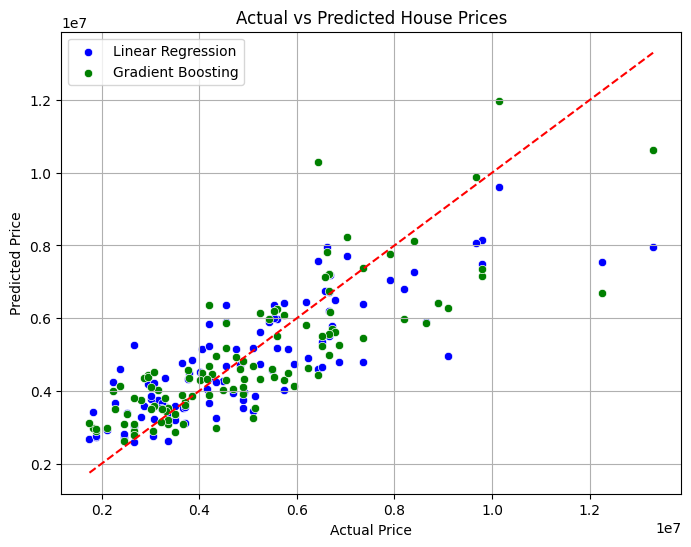

In [19]:
# 📈 Step 8: Visualize predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=lr_preds, color='blue', label='Linear Regression')
sns.scatterplot(x=y_test, y=gb_preds, color='green', label='Gradient Boosting')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.grid(True)
plt.show()